# Multi class image classification using CNN

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-03-24 05:47:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.250.153.207, 142.250.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  45.0MB/s    in 11s     

2024-03-24 05:47:28 (43.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
zip_ref=zipfile.ZipFile("/content/10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 10 directories and 0 ima

In [5]:
train_dir="/content/10_food_classes_all_data/train"
test_dir="/content/10_food_classes_all_data/test"

In [6]:
import os
import numpy as np
classes=np.array(os.listdir("/content/10_food_classes_all_data/train"))
classes

array(['sushi', 'pizza', 'steak', 'fried_rice', 'chicken_wings', 'ramen',
       'grilled_salmon', 'chicken_curry', 'ice_cream', 'hamburger'],
      dtype='<U14')

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import random

def view_random_image(target_dir, target_class):
  target_path="/content/10_food_classes_all_data/"+target_dir+"/"+target_class

  random_img=random.sample(os.listdir(target_path),1)[0]

  img=mpimg.imread(target_path+"/"+random_img)
  plt.imshow(img)
  plt.title(target_class)


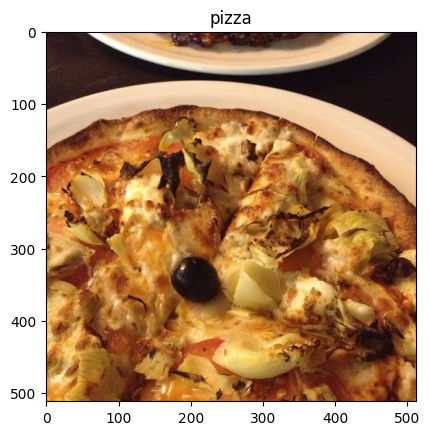

In [8]:
# Visualize the data
import random
img=view_random_image("train", random.choice(classes))

## Preprocessing the data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen=ImageDataGenerator(rescale=1/255)

train_data=data_gen.flow_from_directory(train_dir,
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode="categorical")
test_data=data_gen.flow_from_directory(test_dir,
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Creating and Fitting our Model

In [11]:
## Create a model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model=Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10,10,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history= model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                   validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 40s 149ms/step - loss: 2.1436 - accuracy: 0.2093 - val_loss: 2.0837 - val_accuracy: 0.2644
Epoch 2/5
235/235 [==============================] - 33s 139ms/step - loss: 1.9203 - accuracy: 0.3259 - val_loss: 1.9801 - val_accuracy: 0.3128
Epoch 3/5
235/235 [==============================] - 33s 142ms/step - loss: 1.5428 - accuracy: 0.4771 - val_loss: 1.9626 - val_accuracy: 0.3124
Epoch 4/5
235/235 [==============================] - 31s 130ms/step - loss: 1.0228 - accuracy: 0.6624 - val_loss: 2.3001 - val_accuracy: 0.3156
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.5059 - accuracy: 0.8400 - val_loss: 3.3766 - val_accuracy: 0.2712


## Evaluating the Model

In [12]:
model.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 3.3766 - accuracy: 0.2712


[3.37658429145813, 0.2712000012397766]

In [13]:
def plot_loss(history):
  plt.subplot(1,2,1)
  plt.plot(history.history["loss"])
  plt.plot(history.history["val_loss"])
  plt.xlabel("epochs")
  plt.title("Loss")
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(history.history["accuracy"])
  plt.plot(history.history["val_accuracy"])
  plt.title("Accuracy")
  plt.xlabel("epochs")

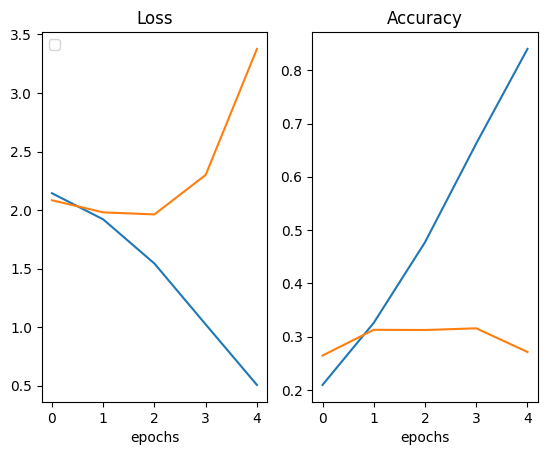

In [14]:
plot_loss(history)

## Improving our model (beat the baseline/ reduce overfitting)

Due to its performanec on training data, it's clear our machine learning model is learning something....

However it is not generalizing well on validation data, so this is a scenario of overfitting

Here are three techniques that can be applied to reduce overfitting

**Get more data**

**Simplify the model**

**Data Augmentation**

**Transfer Learning**

In [17]:
# Let's simplify the model
## Create a model


model_2=Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")])

model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history_2= model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                   validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 35s 143ms/step - loss: 2.0840 - accuracy: 0.2604 - val_loss: 1.9378 - val_accuracy: 0.3032
Epoch 2/5
235/235 [==============================] - 38s 163ms/step - loss: 1.7685 - accuracy: 0.3961 - val_loss: 1.9027 - val_accuracy: 0.3244
Epoch 3/5
235/235 [==============================] - 35s 148ms/step - loss: 1.4398 - accuracy: 0.5303 - val_loss: 1.9450 - val_accuracy: 0.3412
Epoch 4/5
235/235 [==============================] - 37s 157ms/step - loss: 0.9313 - accuracy: 0.7040 - val_loss: 2.3079 - val_accuracy: 0.3160
Epoch 5/5
235/235 [==============================] - 28s 120ms/step - loss: 0.5024 - accuracy: 0.8531 - val_loss: 2.6551 - val_accuracy: 0.3012


In [18]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 29160)             0         
                                                                 
 dense_4 (Dense)             (None, 10)               

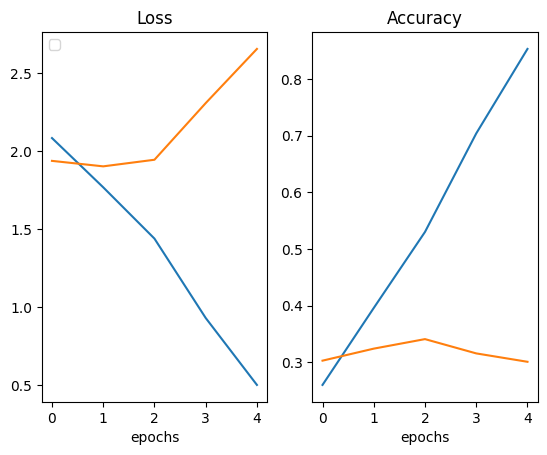

In [20]:
plot_loss(history_2)

This experiment does not improve results, because adding a conv layer does not change number of parameters a lot but learns more feature, so this is not improving our results

Let's try to improve our model results by using data augmentation

In [27]:

train_datagen_augmented=ImageDataGenerator(rescale=1/255,
                                           rotation_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

train_datagen_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [28]:
model_3=tf.keras.models.clone_model(model)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")
model_3.fit(train_datagen_augmented,
            epochs=5,
            steps_per_epoch=len(train_datagen_augmented),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
235/235 [==============================] - 128s 532ms/step - loss: 2.2673 - accuracy: 0.1340 - val_loss: 2.1820 - val_accuracy: 0.1924
Epoch 2/5
235/235 [==============================] - 123s 523ms/step - loss: 2.1785 - accuracy: 0.2032 - val_loss: 2.0361 - val_accuracy: 0.2880
Epoch 3/5
235/235 [==============================] - 137s 584ms/step - loss: 2.0641 - accuracy: 0.2675 - val_loss: 1.9700 - val_accuracy: 0.2924
Epoch 4/5
235/235 [==============================] - 112s 476ms/step - loss: 2.0056 - accuracy: 0.2933 - val_loss: 1.9091 - val_accuracy: 0.3360
Epoch 5/5
235/235 [==============================] - 114s 486ms/step - loss: 1.9676 - accuracy: 0.3112 - val_loss: 1.8373 - val_accuracy: 0.3708


In [30]:
model_3.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 1.8373 - accuracy: 0.3708


[1.8373140096664429, 0.3707999885082245]

In [31]:
model.evaluate(test_data)

79/79 [==============================] - 7s 87ms/step - loss: 4.5782 - accuracy: 0.2592


[4.578162670135498, 0.25920000672340393]

Accuracy is improved a bit in case of data augmentation. If we train longer, we might get good results

In [32]:
plot_loss(history_3)

NameError: name 'history_3' is not defined

## Repeat changing hyperparameters

We can try the following

1. Restructuring our model.
2. Adjust the learning rate
3. Try different methods of data augmentation
4. Training for longer
5. Try transfer learning




In [33]:
# Download some random images
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [35]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [49]:
def pred_and_plot(model,image,classes):
  img=load_and_prep_image(image)
  prediction=model.predict(tf.expand_dims(img,axis=0))
  pred_class=classes[np.argmax(prediction)]
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")

1/1 [==============================] - 0s 29ms/step
[[0.20045717 0.22386996 0.02195596 0.11188722 0.08953091 0.01731404
  0.07885351 0.09333347 0.09557384 0.0672239 ]]


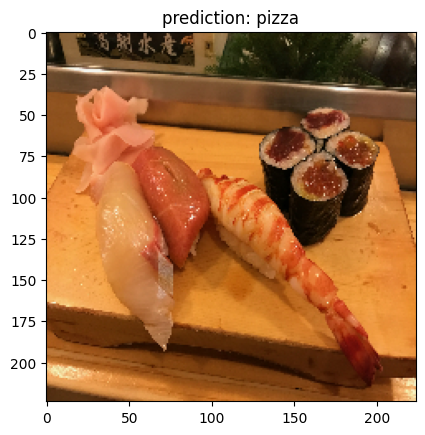

In [50]:
pred_and_plot(model_3,"/content/03-sushi.jpeg", classes)

1/1 [==============================] - 0s 29ms/step
[[0.07613365 0.12264279 0.05064463 0.168861   0.12285454 0.07561523
  0.10807157 0.03169252 0.15810321 0.08538093]]


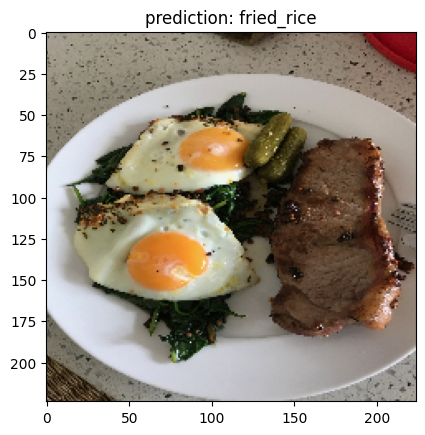

In [51]:
pred_and_plot(model_3,"/content/03-steak.jpeg", classes)